In [1]:
import g2fit
from g2fit.helpers import FullOmegaAFit
import g2fit.fitting as fitting
import ROOT as r 
import matplotlib.pyplot as plt 
import matplotlib
import hist
import uproot
import numpy as np 

Welcome to JupyROOT 6.24/06


In [2]:
python_fit_func = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5])
pyroot_fit_func = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5], fittype='root')

Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + +++++++++++++++++++++++++++++++++++++++++++

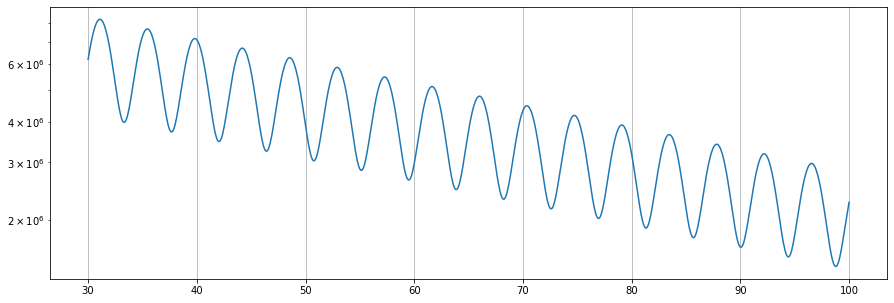

In [4]:
guess = [10_000_000, 0.333, 64., 64.44, 2.33]
xs = np.linspace(30,100,1000)
ystruth = python_fit_func(xs,guess)

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(xs,ystruth)
plt.yscale("log")
plt.grid()
plt.show()

In [5]:
h = hist.Hist(hist.axis.Regular(4700,0,700))
h.axes[0].size

4700

In [6]:
h.reset()
ys = python_fit_func(h.axes[0].centers, guess)
for i in range(h.axes[0].size):
    xi = h.axes[0].centers[i]
    h.fill(h.axes[0].centers[i], weight=ys[i] + np.random.normal(0, np.sqrt(ys[i])))

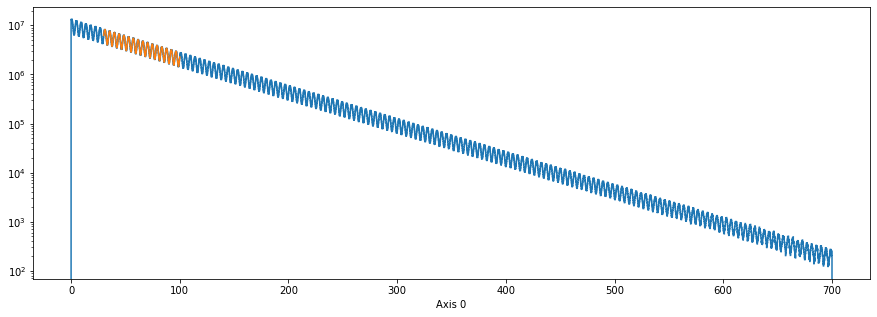

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
h.plot()
plt.plot(xs,ystruth)
plt.yscale("log")
plt.show()

In [9]:
fit = fitting.PyFit.from_hist(
    h, python_fit_func, guess, limits=(30,700)
)

In [10]:
fit.fit()

In [11]:
fit.m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4516 (chi2/ndof = 1.0)     │              Nfcn = 353              │
│ EDM = 6.42e-06 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │10.00044e6 │ 0.00034e6 │ -0.00034e6 │ 0.00034e6  │         │         │       │
│ 1 │ p1   │333.025e-3 │ 0.026e-3  │ -0.026e-3  │  0.026e-3  │         │         │       │
│ 2 │ p2   │   63.7    │    0.9    │    -0.9    │    0.9     │         │         │       │
│ 3 │ p3   │  64.4389  │  0.0012   │  -0.0012   │   0.0012   │         │         │       │
│ 4 │ p4   │  2.32999  │  0.00014  │  -0.00014  │  0.00014   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          p0           │          p1           │          p2           │          p3           │          p4           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.34e3  │  0.34e3   │ -0.026e-3 │ 0.026e-3  │   -0.9    │    0.9    │  -0.0012  │  0.0012   │ -0.14e-3  │  0.14e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────────────────────────────────────┐
│    │        p0        p1        p2        p3        p4 │
├────┼───────────────────────────────────────────────────┤
│ p0 │  1.15e+05 -0.000177     0.946    -0.346 -0.000207 │
│ p1 │ -0.000177  6.78e-10  1.15e-07  4.61e-10 -2.64e-11 │
│ p2 │     0.946  1.15e-07     0.752 -2.59e-06 -0.000102 │
│ p3 │    -0.346  4.61e-10 -2.59e-06  1.53e-06  5.65e-10 │
│ p4 │ -0.000207 -2.64e-11 -0.000102  5.65e-10  2.03e-08 │
└────┴───────────────────────────────────────────────────┘

/home/jlab/github/g2_analysis/submodules/g2fit/fitting.py:292: VisibleDeprecationWarning: propagate is deprecated: use jacobi.propagate instead from jacobi library
  _, ycov = propagate(ding, self.m.values, self.m.covariance)


[2.90737449e+02 2.94183039e+02 2.94312014e+02 ... 5.93126766e-02
 6.03688204e-02 6.01956166e-02]


(<Figure size 1440x576 with 4 Axes>,
 {'A': <AxesSubplot:label='A'>,
  'D': <AxesSubplot:label='D'>,
  'B': <AxesSubplot:label='B'>,
  'C': <AxesSubplot:label='C'>})

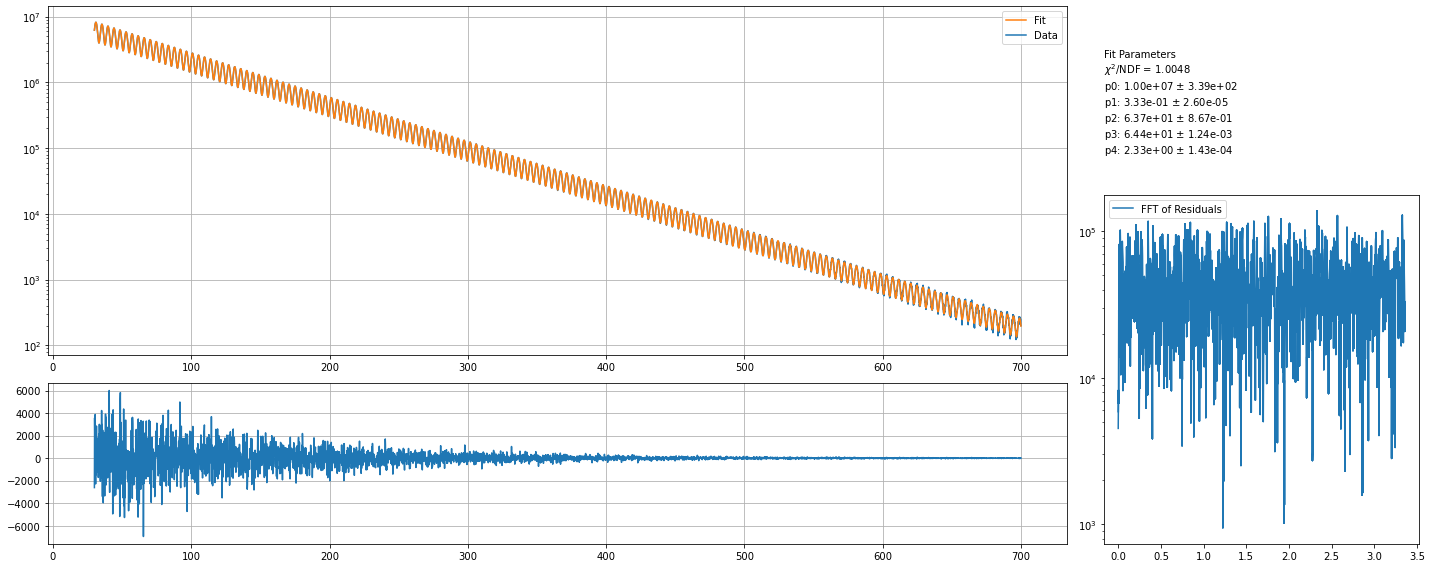

In [12]:
fit.plot()

---

### Now create a pure root implementation of the same fit

In [13]:
h2 = r.TH1D("h2", "Wiggle Plot; Time [#mus]", h.axes[0].size,h.axes[0].edges[0],h.axes[0].edges[-1])
for i in range(h2.GetNbinsX()):
    h2.SetBinContent(i+1, h[i])

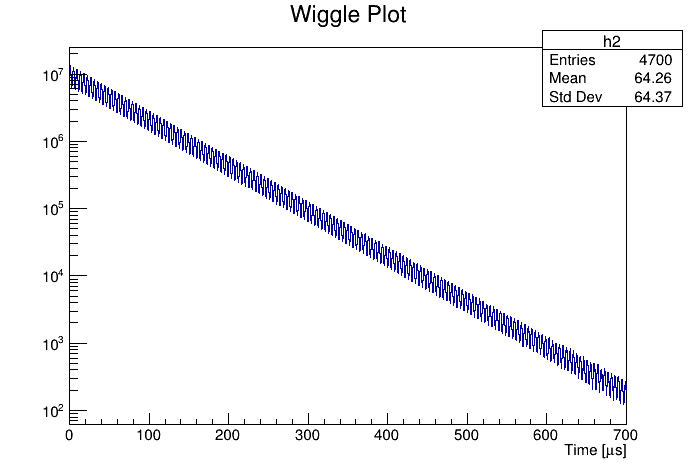

In [14]:
c = r.TCanvas()
h2.Draw()
c.SetLogy()
c.Draw()

In [15]:
func = r.TF1("func", pyroot_fit_func, 30,700,5)
func.SetParNames('N','A','R', "#tau",'#phi')
func.SetParameters(*guess)
func.SetLineColor(2)
func.SetNpx(1000)

 FCN=4515.52 FROM MINOS     STATUS=SUCCESSFUL     38 CALLS         404 TOTAL
                     EDM=1.88052e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.00004e+07   3.39358e+02   2.95657e-03  -3.98291e-12
   2  A            3.33025e-01   2.60448e-05   7.24962e-10  -1.96894e-05
   3  R            6.37298e+01   8.67285e-01  -1.15761e-05   1.03277e-08
   4  #tau         6.44389e+01   1.23579e-03   1.74260e-08  -5.78667e-06
   5  #phi         2.32999e+00   1.42629e-04   1.42629e-04   7.43158e-02


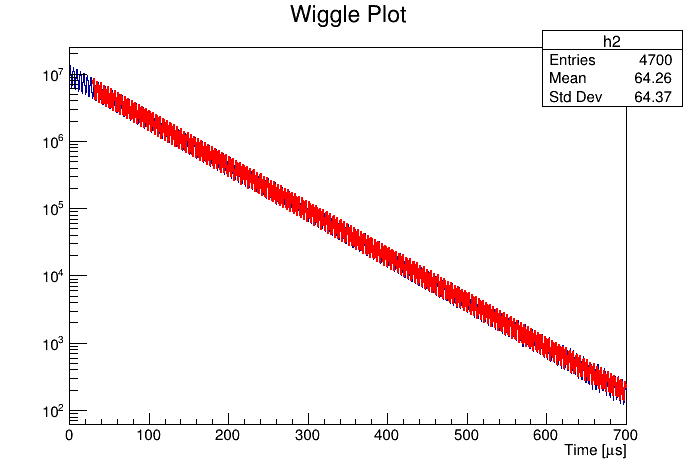

In [16]:
c = r.TCanvas()
h2.Draw()
h2.Fit(func, 'REMB')
func.Draw("SAME")
c.SetLogy()
c.Draw()

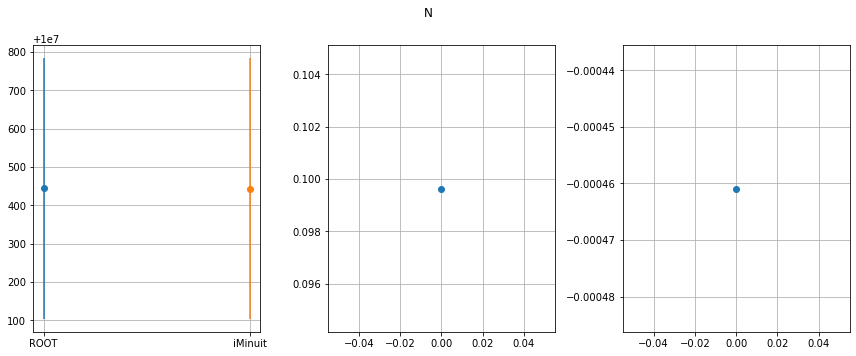

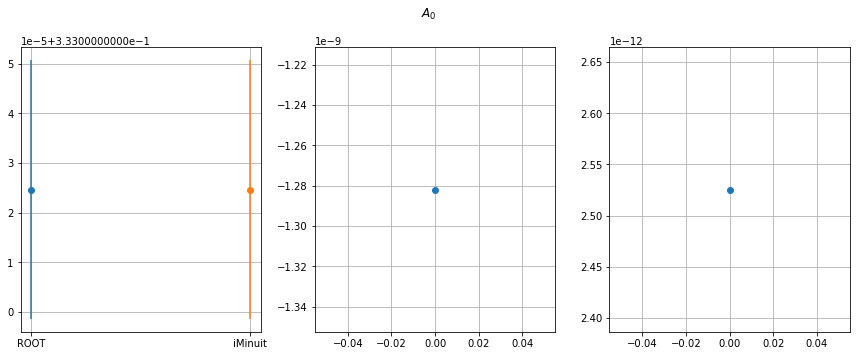

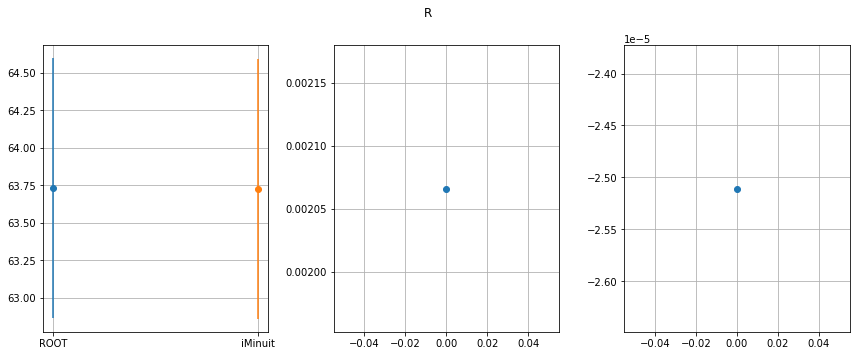

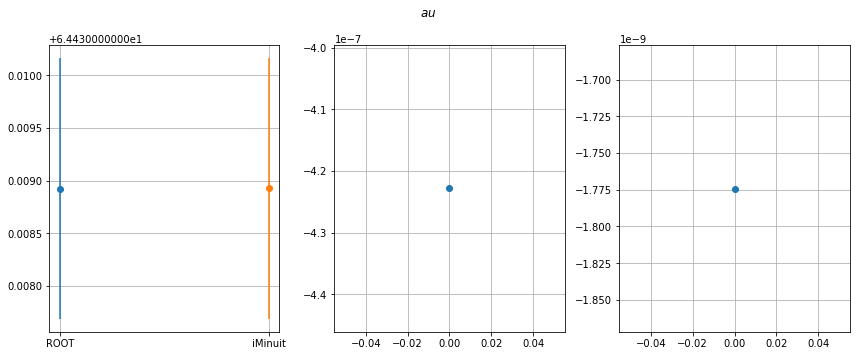

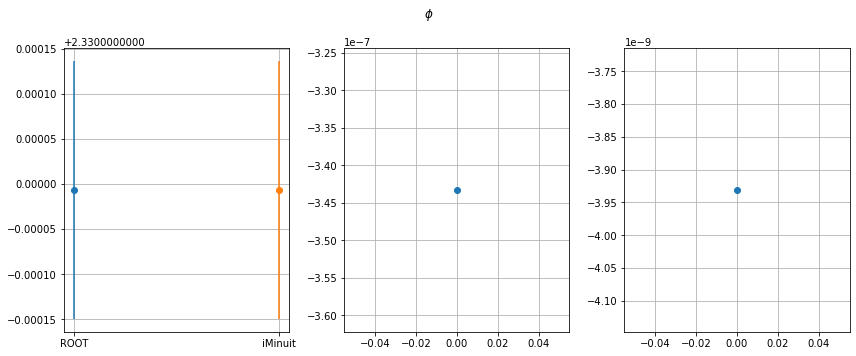

In [17]:
npar=5
for i in range(npar):
    fig,ax = plt.subplots(1,3,figsize=(12,5))
    plt.suptitle(FullOmegaAFit.valid_params[i])
    plt.sca(ax[0])
    plt.errorbar(['ROOT'], [   func.GetParameter(i)], yerr=[func.GetParError(i)], fmt="o")
    plt.errorbar(['iMinuit'], [fit.m.values[i]], yerr=[fit.m.errors[i]], fmt="o")
    plt.tight_layout()
    plt.grid()

    plt.sca(ax[1])
    plt.plot([func.GetParameter(i)-fit.m.values[i]],"o")
    plt.grid()

    plt.sca(ax[2])
    plt.plot([func.GetParError(i)-fit.m.errors[i]],"o")
    plt.grid()

    plt.tight_layout()
    plt.show()

---

### Do the above test a number of times and record the parameters for each fit

In [18]:
def make_t_method(guess):
    ding = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5])
    dong = FullOmegaAFit('this is a phrase', FullOmegaAFit.valid_params[:5], fittype='root')

    # %%
    h = hist.Hist(hist.axis.Regular(4700,0,700))
    h.axes[0].size

    # %%
    h.reset()
    ys = ding(h.axes[0].centers, guess)
    for i in range(h.axes[0].size):
        xi = h.axes[0].centers[i]
        h.fill(h.axes[0].centers[i], weight=ys[i] + np.random.normal(0, np.sqrt(ys[i])))

    return h, ding, dong
    

def do_fit_and_get_parameters(h, ding, dong, guess):

    fit = fitting.PyFit.from_hist(
        h, ding, guess, limits=(30,700)
    )

    # %%
    fit.fit()

    # %%
    # fit.m

    # %%
    # fit.plot()

    h2 = r.TH1D("h2", "Wiggle Plot; Time [#mus]", h.axes[0].size,h.axes[0].edges[0],h.axes[0].edges[-1])
    for i in range(h2.GetNbinsX()):
        h2.SetBinContent(i+1, h[i])

    # %%
    # c = r.TCanvas()
    # h2.Draw()
    # c.SetLogy()
    # c.Draw()


    func = r.TF1("func", dong, 30,700,5)
    func.SetParNames('N','#tau','A','R','#phi')
    func.SetParameters(*guess)
    func.SetLineColor(2)
    func.SetNpx(1000)

    h2.Fit(func, 'REMBQ')

    return ((fit.m.values, fit.m.errors), ([func.GetParameter(i) for i in range(5)], [func.GetParError(i) for i in range(5)]))


In [22]:
params = []
for i in range(100):
    h, ding,dong = make_t_method(guess)
    these = do_fit_and_get_parameters(h, ding,dong, guess)
    print(these)
    params.append(these)
    # break

Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
((<ValueView p0=10000175.788242083 p1=0.33298140378255936 p2=64.61688308880842 p3=64.43933456062075 p4=2.3300072433854555>, <ErrorView p0=339.35618101742983 p1=2.604531890999989e-05 p2=0.8674464163965249 p3=0.001235834855745746 p4=0.00014267098177571575>), ([10000175.788855575, 0.3329814039040357, 64.61687288230044, 64.43933455402016, 2.3300072436697348], [339.3556317704724, 2.604531362592017e-05, 0.8674501242147977, 0.0012358328043590454, 0.00014267199021672077]))
Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
Fitting with 5 parameters: ['N', '$A_{0}$', 'R', '$\tau$', '$\\phi$']
((<ValueView p0=9999586.878192712 p1=0.3329881508513555 p2=63.99084772195 p3=64.44115100005664 p4=2.329897639718009>, <ErrorView p0=339.3373499610669 p1=2.6044810248689808e-05 p2=0.8672893957656017 p3=0.0012358823540208432 p4=0.00014265379926056167>)

In [23]:
import pickle
with open("./data/test_fitter.pickle", 'wb') as fout:
    pickle.dump(params, fout)

In [24]:
# with open("./data/test_fitter.pickle", 'rb') as fin:
#     params = pickle.load(fin)

In [25]:
pypars =   [x for x in zip(*[x[0][0] for x in params])]
pyerrs =   [x for x in zip(*[x[0][1] for x in params])]
rootpars = [x for x in zip(*[x[1][0] for x in params])]
rooterrs = [x for x in zip(*[x[1][1] for x in params])]

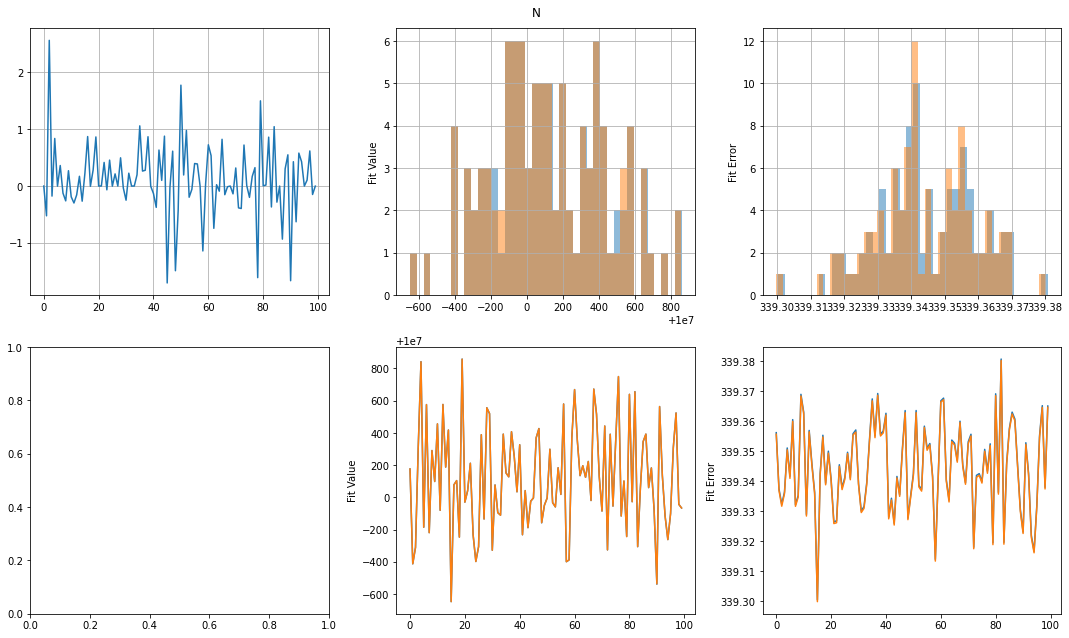

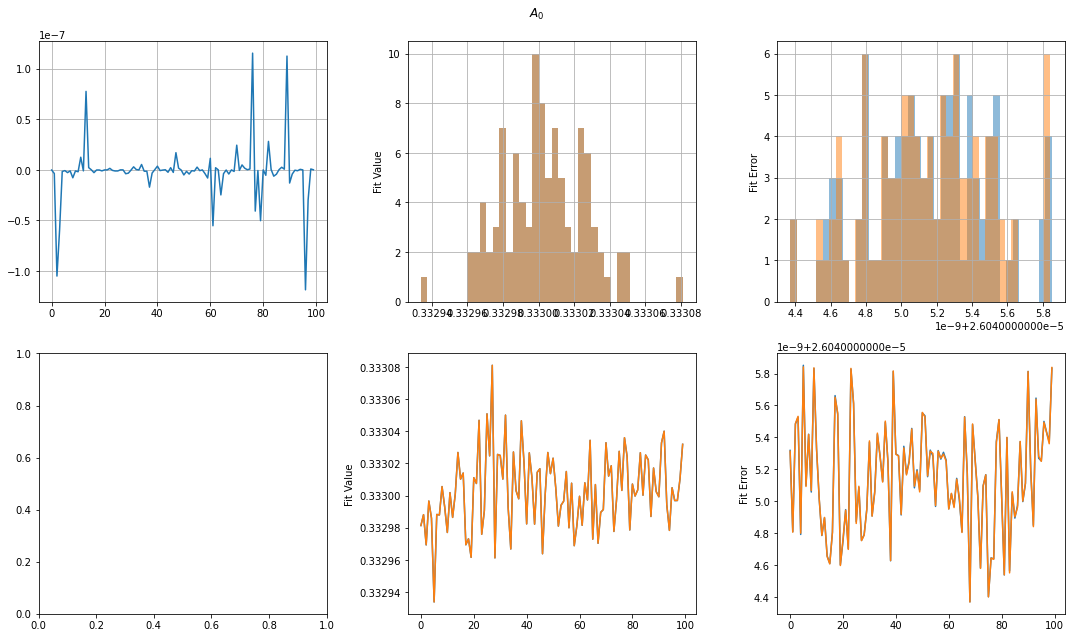

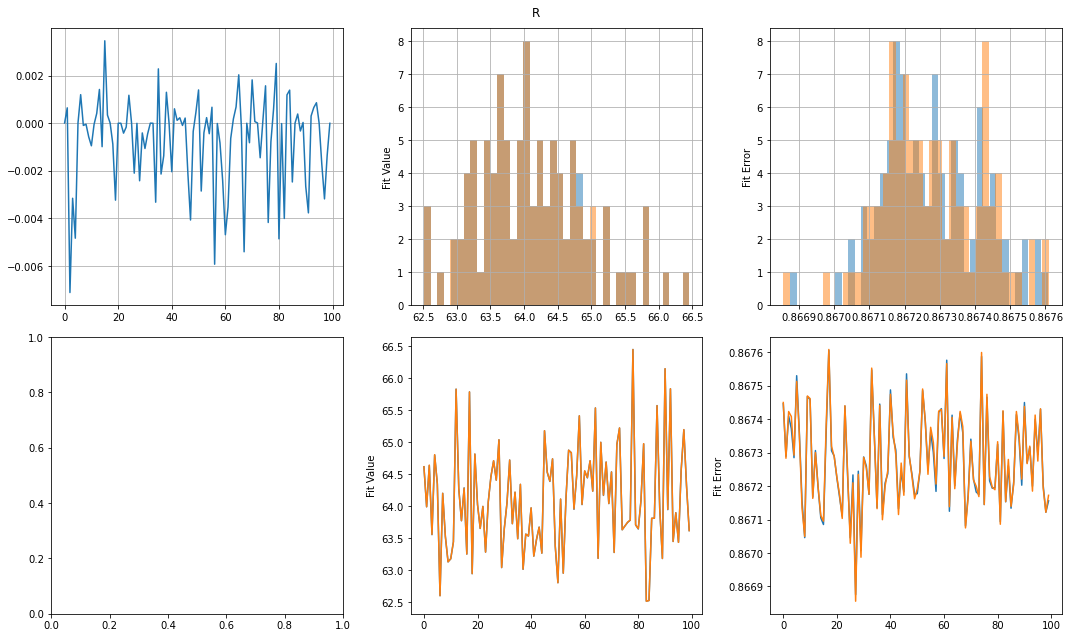

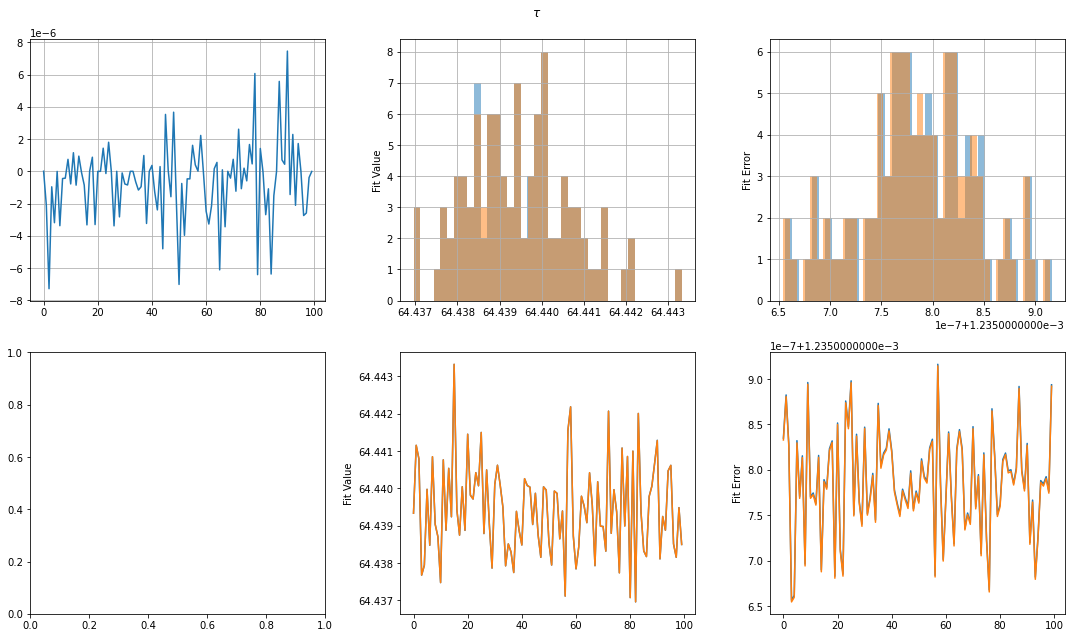

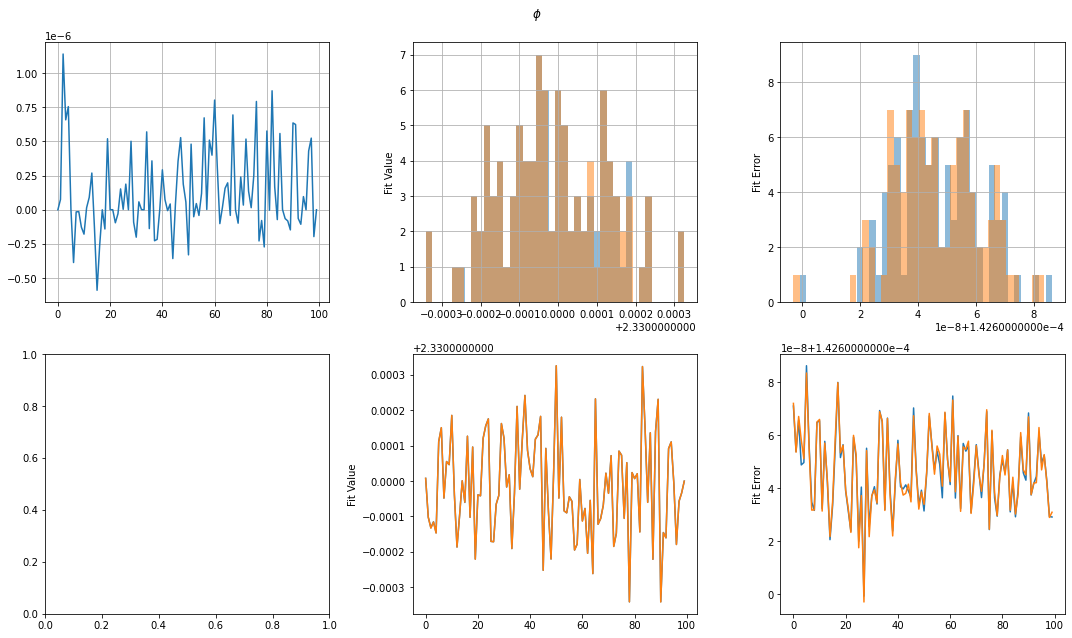

In [26]:
for i in range(5):
    fig,ax2 = plt.subplots(2,3,figsize=(15,9))
    # ax[0].plot((np.array(pypars[i])- np.array(rootpars[i]))/(np.array(pypars[i])))
    ax = ax2[0]
    ax[0].plot((np.array(pypars[i])- np.array(rootpars[i])))

    ax[1].hist(pypars[i],bins=40, alpha=0.5)
    ax[1].hist(rootpars[i],bins=40, alpha=0.5)
    ax[1].set_ylabel("Fit Value")
    

    ax[2].hist(pyerrs[i],bins=40, alpha=0.5)
    ax[2].hist(rooterrs[i],bins=40, alpha=0.5)
    ax[2].set_ylabel("Fit Error")

    for axi in ax:
        axi.grid()

    ax2[1][1].plot(pypars[i])
    ax2[1][1].plot(rootpars[i])
    ax2[1][1].set_ylabel("Fit Value")
        

    ax2[1][2].plot(pyerrs[i])
    ax2[1][2].plot(rooterrs[i])
    ax2[1][2].set_ylabel("Fit Error")


    plt.suptitle(FullOmegaAFit.valid_params[i].replace("\t","\\t"))
    plt.tight_layout()

    plt.show()
    # break